# Linear Regression

This notebook is all about simple linear regression.  
It includes a more in-depth explanation on linear regression, its equation and its application in Python.

**Objectives**  
At the end of the notebook you should be able to:
- define the relationship between two variables
- define the concepts of intercept and slope
- reproduce the equation of Linear Regression
- explain the concept behind OLS
- build a linear regression model with the statsmodels module in Python
- interpret the output of a linear regression model built with the statsmodels module

<center><img src="https://upload.wikimedia.org/wikipedia/commons/thumb/3/3a/Linear_regression.svg/400px-Linear_regression.svg.png" height="300"/></center>

## What is linear regression?


In statistics, **linear regression** is an approach for modeling the relationship between  
- a response/dependent variable $y$  
- and one or more explanatory/independent variables $x_1, x_2, ..., x_n $.  

Important: Linear regression can prove a relationship, but it **cannot prove causality**.


* **Simple linear regression**: only one explanatory variable
* **Multiple linear regression**: more than one explanatory variable

## Let's start with an example

Suppose we want to explore the relationship between the fuel efficiency of a car (mpg, miles-per-gallon) and its weight in kilograms.

We will use the data set `cars` which contains variables `mpg` and `weight`.  
This dataset is downloaded from [vincentarelbundock's github](https://vincentarelbundock.github.io/Rdatasets).

In [2]:
# Import necessary libraries
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

# this so called "line magic" command, amongst other things, stores the plots in the notebook document.
%matplotlib inline

# warnings supression
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [3]:
# unzip data (the trailing exclamation mark passes a command directly to the shell, not to the python interpreter,
# so this works as if you'd execute the command to unzip the file in your terminal window)
!unzip data.zip

Archive:  data.zip
replace data/abalone.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: ^C


In [4]:
# read in cars dataset and mark all questionmarks as NaNs.
cars = pd.read_csv("data/cars_multivariate.csv",
                  na_values='?')
cars.head(n=2)

,mpg,cylinders,displacement,horsepower,weight,acceleration,model,origin,car_name
0,18.0,8,307.0,130.0,3504.0,12.0,70,1,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693.0,11.5,70,1,buick skylark 320


As stated above, we want to model the relationship between `mpg` and `weight` with a straight line.  
First, let's look at a scatterplot to get an idea about how our data is distributed.

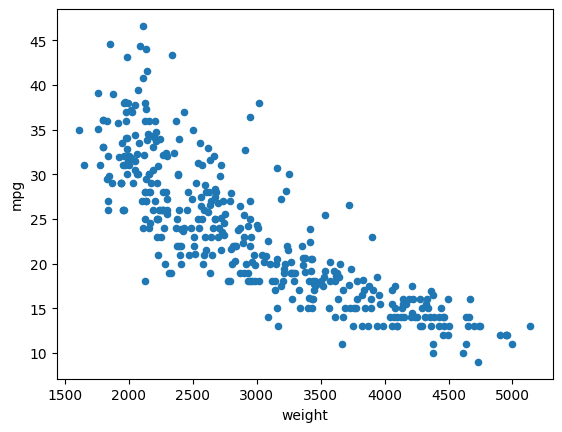

In [5]:
# Plot the variables of interest first
cars.plot(x='weight', 
          y='mpg', 
          kind='scatter');

As we see, there seems to be a negative correlation between a cars fuel efficiency and its weight.

When talking about modeling our data with a straight line, linear regression comes into play!  
**Linear regression** is just the fancy term for **finding the line of best fit**.

In other words, we are looking for the **slope** and **intercept** that defines a line that fits the data as well as possible, which mainly means that we are trying to minimize the sum of squared residuals (deviations of the estimated y-values from the true y-values)

* **Intercept** - The value for $y$ when $x=0$ 

* **slope** - For each unit increase in $x$, the expected increase/decrease in $y$  
(in the case of __multiple__ linear regression, we need to add "holding all other explanatory variables constant", since then there are more than one explanatory variable in the model.)

## Linear regression from scratch

In order to better understand the line equation of linear regression, we will start with finding the line between two points. 
This from-scratch method should help you understand the concepts of intercept and slope better.

Let's build a function which takes two arbitrary points p1, p2 each in the format [x, y] to calculate slope and intercept of the line between the two points.

In [6]:
# Function that returns slope and intercept
def get_line_equation(p1, p2):
    """
    Solve the system of equations:
    y1 = m*x1 + b
    y2 = m*x2 + b
    
    This translates to:
    m = (y2 - y1) / (x2 - x1)
    b = y1 - m*x1
    
    Input:
    p1: first point [x1, y1]
    p2: second point [x2, y2]
    
    returns: slope, intercept
    """
    m = (p2[1] - p1[1]) / (p2[0] - p1[0]) # Slope y1-y2/x1-x2
    b = p1[1] - m * p1[0] # Intercept
    return  m, b

Now, we calculate the intercept and slope of a line between two observations of our dataset.  
Therefore, we choose two points (here we use the first two observations of our dataset).

In [7]:
car1 = [cars.weight[0], cars.mpg[0]]
car2 = [cars.weight[1], cars.mpg[1]]

print(f'point 1:{car1}, point 2:{car2}')

point 1:[3504.0, 18.0], point 2:[3693.0, 15.0]


Now, we calculate the slope and intercept of the line between the chosen points by passing the points into our just created function.

In [8]:
slope, intercept = get_line_equation(p1=car1, p2=car2)

print(f'intercept: {intercept}, slope: {slope}')

intercept: 73.61904761904762, slope: -0.015873015873015872


Now we got our intercept and slope for a line between the first two points of our dataset. Time to draw it onto our scatterplot:

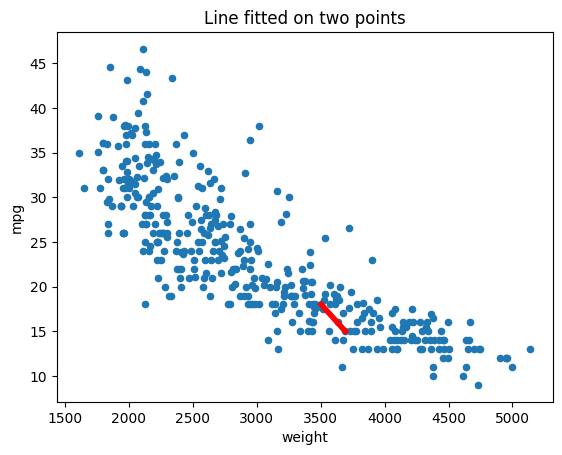

In [9]:
# plot the scatterplot again 
fig = cars.plot(x='weight', 
                y='mpg', 
                kind='scatter')

# plot the line between the two points
plt.plot([car1[0], car2[0]], [car1[1], car2[1]], color="red", linewidth=4)

# plot a title
plt.title("Line fitted on two points");

As you may see, the red line between the two points p1 and p2 is probably not the best choice when taking all of our data points into account, at least the slope seems too steep at first glance.  
We need to find new coefficients for the intercept and slope which resemble our whole data the best.

---
## Simple linear regression formally defined
Model assumption: y and x are linearly related.  

General formula for a linear regression (this is a formula you should keep in mind):  
$$y = \beta_0 + \beta_1 x_1 + \varepsilon$$  
where $\beta_0, \beta_1$ are the regression coefficients, $x$ is the independent variable and $\varepsilon$ is the random error.  

In linear regression, we try to find the _line of best fit_ that describes our data best.  

The equation that takes all data into account looks like this:  
$$y_i = \hat{\beta_0} + \hat{\beta_1} x_i + e_i$$  
where $_i$ is the number of observations, $\hat{\beta_0} + \hat{\beta_1} x_i$ is considered the "fit" and $e_i$ is the residual error of every observation.

Our data is modeled as "fit + residual" and we want to reduce the residuals $e_i$,  
where $e_i = y_i - \hat{y}_i$ is the difference between an observed value and the estimated value provided by a model,  
and $\hat{y}_i = \hat{\beta}_0 + \hat{\beta}_1 x_i$  
where $\hat{\beta}_0$ and $\hat{\beta}_1$ are the estimated regression coefficients.

<left><img src="http://68.media.tumblr.com/7efec0c9403dd3b9eeb181e1681cd3d2/tumblr_inline_nii9j9oqS61rs8rb9.gif" height="250"/></left>

---
## Ordinary Least Squares (OLS)

OLS is the simplest and most common way to estimate the intercept and the slope.

It estimates by minimizing the sum of squared residuals: $\sum_{i=1}^n e_i^2$

Have a look at this [visual explanation](http://setosa.io/ev/ordinary-least-squares-regression/) for better understanding.

---
## Simple linear regression in Python 

In the next section you will build a linear regression model using one dependent and one independent variable from the cars dataset.

We will use the [statsmodel.api](https://www.statsmodels.org/stable/api.html) module, which is a Python module that provides classes and functions for the estimation of many different statistical models. If you like, follow the link for a reference of available models, statistics, and tools.  

There of course are different modules in python which you can perform OLS with.  
We chose for this module because it gives us the option of easily printing a summary that will give us lots of statistical insights in our model itself.

So let's import it:

In [10]:
# import the statsmodels.api module
import statsmodels.api as sm

Now, we'll prepare our data in a typical manner for modeling by chosing the dependent variable (in lowercase letter) and the independent variable (in uppercase letter).

In [11]:
# Choose the independent variable, the predictor X
X = cars[['weight']]

# Define dependent variable (since it's always a single variable, we can use dot notation here)
y = cars.mpg

display(X.head())
display(y.head())

,weight
0,3504.0
1,3693.0
2,3436.0
3,3433.0
4,3449.0


0    18.0
1    15.0
2    18.0
3    16.0
4    17.0
Name: mpg, dtype: float64

**Deep Dive: Why do we have to add a constant?**  
Statsmodel does not fit the intercept by default! Thus, if we don't add a constant, we won't have an adjustable intercept and our model is forced to let the regression line go through the origin of the coordinate system.
The “const” column provides a placeholder — a bunch of 1s as constants which can be multiplied by $\beta_0$.

In [12]:
# Since our statsmodel OLS model needs an adjustable intercept, we add a column of 1s to:
X = sm.add_constant(X)
display(X.head())

,const,weight
0,1.0,3504.0
1,1.0,3693.0
2,1.0,3436.0
3,1.0,3433.0
4,1.0,3449.0


Now, our data is prepared for modeling!  

The following steps are:
- creating a model based on the modules notation,
- fitting the model to our data (this is the part where the sum of squared residuals is reduced to min - and passing the model results in a result variable)
- print a summary with the models statistics

In [13]:
# create an OLS model
our_model = sm.OLS(y, X)

# use the data to calculate the intercept and slope
model_results = our_model.fit()

# return the output of the model
model_results.summary() # summary contains eg. 'const' (intercept) and 'slope' of the regression equation.

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                    mpg   R-squared:                       0.693
Model:                            OLS   Adj. R-squared:                  0.692
Method:                 Least Squares   F-statistic:                     878.8
Date:                Wed, 19 Oct 2022   Prob (F-statistic):          6.02e-102
Time:                        15:08:56   Log-Likelihood:                -1130.0
No. Observations:                 392   AIC:                             2264.
Df Residuals:                     390   BIC:                             2272.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         46.2165      0.799     57.867      0.000      44.646      47.787
weight        -0.0076      0.000    -29.645      0.000      -0.008      -0.007
==============================================================================
Omnibus:                       41.682   Durbin-Watson:                   0.808
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               60.039
Skew:                           0.727   Prob(JB):                     9.18e-14
Kurtosis:                       4.251   Cond. No.                     1.13e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.13e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In [14]:
# print out the intercept and slope of your model by adressing the parameters via ".params"
# (you can also find it in the table above by looking at const coef and weight coef)
intercept, slope = model_results.params

print(f'intercept: {intercept}, slope: {slope}')

intercept: 46.216524549017606, slope: -0.00764734253577958


## Model Interpretation

In the following you find the metrics which are most important for us.  
For a __complete explanation of all of the metrics within the model__ summary check the __end of the notebook__.  


<img src="images/ols_results_1.png" width="400"> 

R-squared, $\textbf{R}^2$ - Proportion of the variation in $y$ that is explained by the model. Measured on a scale from 0 (bad) to 1 (good)  
**const coef** - This is the intercept, in other words: value of y when x = 0  
**weight coef** - This is the slope, in other words: Amount, y changes for each unit change of x  

To finalize the modeling part, we will plot our data again and additionally plot our final regression line by using the intercept and the slope from our OLS model results:

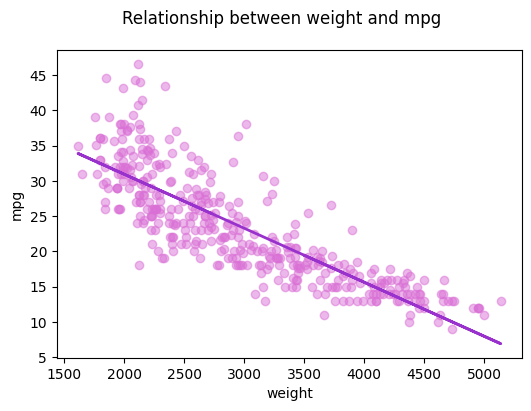

In [15]:
# Plotting the results of our model
fig, ax = plt.subplots(figsize=(6, 4))

x = cars['weight']
y = cars['mpg']

# add data points
ax.scatter(x, y, alpha=0.5, color='orchid')
fig.suptitle('Relationship between weight and mpg')

# plotting the regression line with the help of our calculated intercept and slope variables
ax.plot(x, x*slope+intercept, '-', color='darkorchid', linewidth=2);
ax.set_ylabel("mpg");
ax.set_xlabel("weight");

---
## Try it out yourself

We added a constant earlier to our linear regression model. 
What happens if we don't use one? Is our model describing the dependent variable better or worse?

Try out at least one other independent variable to explain `mpg` with a simple linear regression.
Also try to plot the points and the regression line using to code just above.





In [16]:
# When doing repeatitive work, always think about parametrising your work i.e. building functions:

def create_fit_model(X, y, add_intercept=None):
    """ 
    Returns the model summary, the intercept and the slope of a fitted model 
    
    If the argument `add_intercept` isn't passed in, no intercept is added to the model

    Parameters
    ----------
    X : pandas.core.frame.DataFrame
        The independant variable, also called feature
    y:  pandas.core.series.Series
        The independant or target variable
    add_intercept: boolean, optional
        If True, an intercept is added to the model

    Returns
    ------
    model summary, the intercept and the slope
    """
    
    # adding an intercept
    if add_intercept:
        X = sm.add_constant(X)
        
    # create an OLS model
    model = sm.OLS(y, X)
    
    # use the data to calculate the intercept and slope
    model_results = model.fit()
    
    # Getting the intercept and slope of the model
    if add_intercept:
        intercept, slope = model_results.params
    else:
        intercept = 0
        slope = model_results.params[0]

    return model_results.summary(), intercept, slope

In [17]:
def plot_regression(x, y, intercept, slope, x_label=None):
    """ 
    Plots the regression line along with the scatter plots of x and y

    Parameters
    ----------
    x : pandas.core.series.Series
        The independant variable, also called feature
    y:  pandas.core.series.Series
        The independant or target variable
    intercept: float
        The intercept for the regression line
    slope: float
        The slope for the regression line
    x_label: str, optional
        The label for the x variable on the graph
    """
    
    # Plotting the results of our model
    fig, ax = plt.subplots(figsize=(6, 4))

    # add data points
    ax.scatter(x, y, alpha=0.5, color='orchid')
    fig.suptitle(f'Relationship between {x_label} and mpg')

    # plotting the regression line with the help of our calculated intercept and slope variables
    ax.plot(x, x*slope+intercept, '-', color='darkorchid', linewidth=2);
    ax.set_ylabel("mpg");
    ax.set_xlabel(x_label);

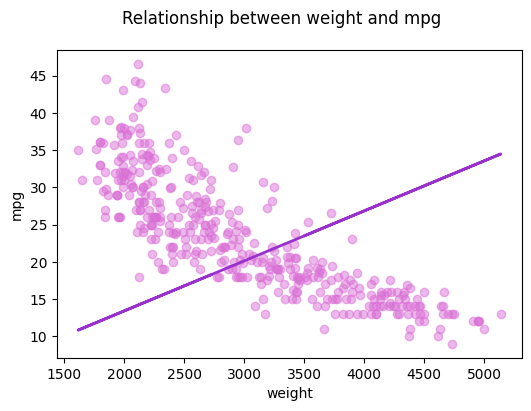

In [18]:
# Now that we have defined these handy functions, let's use them:

# First, let's try the regression model without the intercept:

X = cars[['weight']]
y = cars.mpg
x = cars['weight']

model_summary, intercept, slope = create_fit_model(X, y)
plot_regression(x, y, intercept, slope, "weight")


As we can see, forcing the intercept to be 0 is not a good idea. Indeed, the mpg values are high for low values of weight. In addition, mpg decreases as weight increases. Therefore, forcing the intercept to be 0 leads the regression line to be completely wrong. 

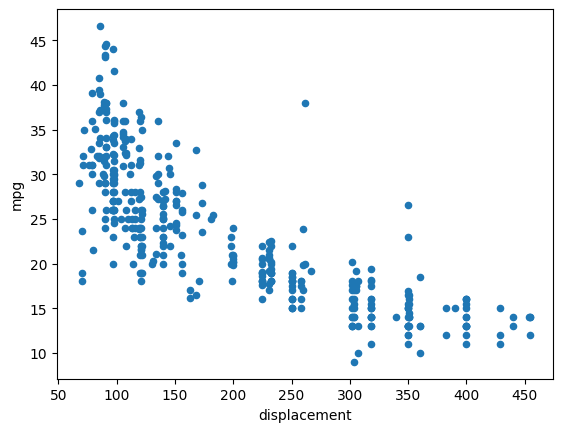

In [19]:
# Now that we have automated our work thanks to the functions, we can try another variable easily.
# For example, let's try with displacement

# First, let's plot the variables to have an idea of how the data look like, 
# if regression makes sense and if adding an intercept makes sense too!

# Plot the variables of interest first
cars.plot(x='displacement', 
          y='mpg', 
          kind='scatter');

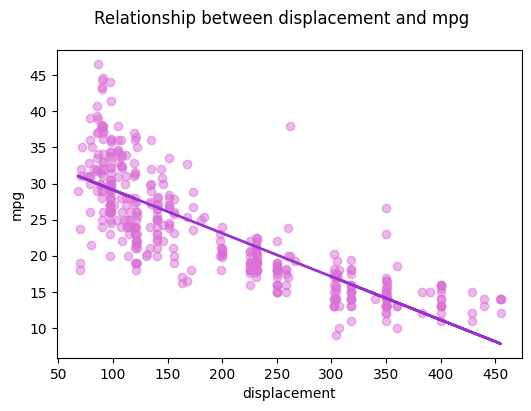

In [20]:
## As we can see, the relation seems to be negatively correlated just like with weight.
# Since there are high values of mpg for low value of displacement, adding an intercept makes sense

# So, let's fit this regression

# Define the variables
# I'm even too lazy to repeat the variable name... so I will automate that part too!
# Next time, there will be only one line to change!
x_name = 'displacement'
X = cars[[x_name]]
y = cars.mpg
x = cars[x_name]

# Fit the model (note that we add the intercept in the parameters of the function)
model_summary, intercept, slope = create_fit_model(X, y, add_intercept=True)

# Plot the graph
plot_regression(x, y, intercept, slope, x_name)

## Summary

- Linear regression is finding the best fit line to data
- Simple linear regression is 1 outcome/dependent and 1 explanatory/independent variable
- Linear regression can prove a relationship, but it **cannot prove causality**
- Ordinary Least Squares (OLS) is the fitting algorithm, which mathematically finds the best fitting line to our data
- $\textbf{R}^2$ is the proportion of the variation explained by the model

Good resource: [realpython.com: Linear Regression](https://realpython.com/linear-regression-in-python/)

## Deep Dive: Model Summary

In the following, the model output is explained in more detail. Remember the metrics which are most important for us in the first place though.

* You can find the R-Squared, which is 0.693 i.e. very highly related
* You can also look at the coefficients of the model for intercept and slope (next to "weight")
* Kurtosis and Skew values are shown here
* A lot of significance testing is being done here


**Here is a brief description of these measures:**

The left part of the first table gives some specifics on the data and the model:

* **Dep. Variable**: Singular. Which variable is the point of interest of the model
* **Model**: Technique used, an abbreviated version of Method (see methods for more).
* **Method**: The loss function optimized in the parameter selection process. Least Squares since it picks the parameters that reduce the training error. This is also known as Mean Square Error [MSE].
* **No. Observations**: The number of observations used by the model, or size of the training data.
* **Degrees of Freedom Residuals**: Degrees of freedom of the residuals, which is the number of observations – number of parameters. Intercept is a parameter. The purpose of Degrees of Freedom is to reflect the impact of descriptive/summarizing statistics in the model, which in regression is the coefficient. Since the observations must "live up" to these parameters, they only have so many free observations, and the rest must be reserved to "live up" to the parameters' prophecy. This internal mechanism ensures that there are enough observations to match the parameters.
* **Degrees of Freedom Model**: The number of parameters in the model (not including the constant/intercept term if present)
* **Covariance Type**: Robust regression methods are designed to be not overly affected by violations of assumptions by the underlying data-generating process. Since this model is Ordinary Least Squares, it is non-robust and therefore highly sensitive to outliers.

The right part of the first table shows the goodness of fit 

* **R-squared**: The coefficient of determination, the Sum Squares of Regression divided by Total Sum Squares. This translates to the percent of variance explained by the model. The remaining percentage represents the variance explained by error, the E term, the part that model and predictors fail to grasp.
* **Adj. R-squared**: Version of the R-Squared that penalizes additional independent variables. 
* **F-statistic**: A measure of how significant the fit is. The mean squared error of the model divided by the mean squared error of the residuals. Feeds into the calculation of the P-Value.
* **Prob (F-statistic) or P-Value**: The probability that a sample like this would yield the above statistic, and whether the model's verdict on the null hypothesis will consistently represent the population. Does not measure effect magnitude, instead measures the integrity and consistency of this test on this group of data.
* **Log-likelihood**: The log of the likelihood function.
* **AIC**: The Akaike Information Criterion. Adjusts the log-likelihood based on the number of observations and the complexity of the model. Penalizes the model selection metrics when more independent variables are added.
* **BIC**: The Bayesian Information Criterion. Similar to the AIC, but has a higher penalty for models with more parameters. Penalizes the model selection metrics when more independent variables are added.

Second Table: Coefficient Reports 

* **coef**: The estimated value of the coefficient. By how much the model multiplies the independent value by.
* **std err**: The basic standard error of the estimate of the coefficient. Average distance deviation of the points from the model, which offers a unit relevant way to gauge model accuracy.
* **t**: The t-statistic value. This is a measure of how statistically significant the coefficient is.
* **P > |t|**: P-value that the null-hypothesis that the coefficient = 0 is true. If it is less than the confidence level, often 0.05, it indicates that there is a statistically significant relationship between the term and the response.
* **[95.0% Conf. Interval]**: The lower and upper values of the 95% confidence interval. Specific range of the possible coefficient values.

Third Table: Residuals, Autocorrelation, and Multicollinearity 

* **Skewness**: A measure of the symmetry of the data about the mean. Normally-distributed errors should be symmetrically distributed about the mean (equal amounts above and below the line). The normal distribution has 0 skew.
* **Kurtosis**: A measure of the shape of the distribution. Compares the amount of data close to the mean with those far away from the mean (in the tails), so model "peakiness". The normal distribution has a Kurtosis of 3, and the greater the number, the more the curve peaks.
* **Omnibus D’Angostino’s test**: It provides a combined statistical test for the presence of skewness and kurtosis.
* **Prob(Omnibus)**: The above statistic turned into a probability
* **Jarque-Bera**: A different test of the skewness and kurtosis
* **Prob (JB)**: The above statistic turned into a probability
* **Durbin-Watson**: A test for the presence of autocorrelation (that the errors are not independent), which is often important in time-series analysis
* **Cond. No**: A test for multicollinearity (if in a fit with multiple parameters, the parameters are related to each other).




### Deep-dive into $\textbf{R}^2$ 

How to calculate $\textbf{R}^2$:

$R^2 = \frac{SSR}{SST}$

SST = SSR + SSE

* Total sum of squares (**SST**): $\sum_{i=1}^n (y_i - \bar{y})^2$


* Regression sum of squares (**SSR**): $\sum_{i=1}^n (\hat{y}_i - \bar{y})^2$


* Residual sum of squares (**SSE**): $\sum_{i=1}^n e_i^2$